In [189]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import matplotlib.ticker as ticker

def plot_tensorboard_tag(log_dirs, tag, ylim=None, log_func=None):
    plt.figure(figsize=[18, 4])

    # Function to format the x-axis labels as 'k' (thousands)
    def format_func(value, tick_number):
        return f'{int(value/1000)}k' if value >= 1000 else int(value)

    for log_dir in log_dirs:
        # Event accumulator to load the logs
        ea = event_accumulator.EventAccumulator(log_dir,
            size_guidance={event_accumulator.SCALARS: 0})
        ea.Reload()

        if tag in ea.Tags()['scalars']:
            events = ea.Scalars(tag)
            steps = [e.step for e in events]
            values = [e.value for e in events]
            if log_func is not None:
                plt.plot(steps, log_func(values), label=log_dir.split('/')[-1], alpha=0.3)
            else:    
                plt.plot(steps, values, label=log_dir.split('/')[-1], alpha=0.3)
            
    plt.xlabel('Steps')
    plt.ylabel(tag)
    plt.title(f'TensorBoard Scalars: {tag}')
    plt.legend()

    # Set the custom formatter for the x-axis
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

    if ylim is not None:
        plt.ylim(ylim)
    plt.grid() 
    plt.show()


In [190]:
def get_scalars(log_dirs):

    scalars_list = {}
    for log_dir in log_dirs:
        # Event accumulator to load the logs
        ea = event_accumulator.EventAccumulator(log_dir,
            size_guidance={event_accumulator.SCALARS: 0})
        ea.Reload()

        scalars = {}
        for tag in ea.Tags()['scalars']:
            events = ea.Scalars(tag)
            steps = [e.step for e in events]
            values = [e.value for e in events]
            scalars[tag] = (steps, values)
        scalars_list[log_dir] = scalars
    return scalars_list

In [191]:
log_dirs = ['/home/save/lse/train_dalle/train01.30-2',
            '/home/save/lse/train_dalle/train01.19-7_tanh_0.999_lr1e-4',
            '/home/save/lse/train_dalle/train01.31-1',
           ]

scalars = get_scalars(log_dirs)
print(scalars.keys())

dict_keys(['/home/save/lse/train_dalle/train01.30-2', '/home/save/lse/train_dalle/train01.19-7_tanh_0.999_lr1e-4', '/home/save/lse/train_dalle/train01.31-1'])


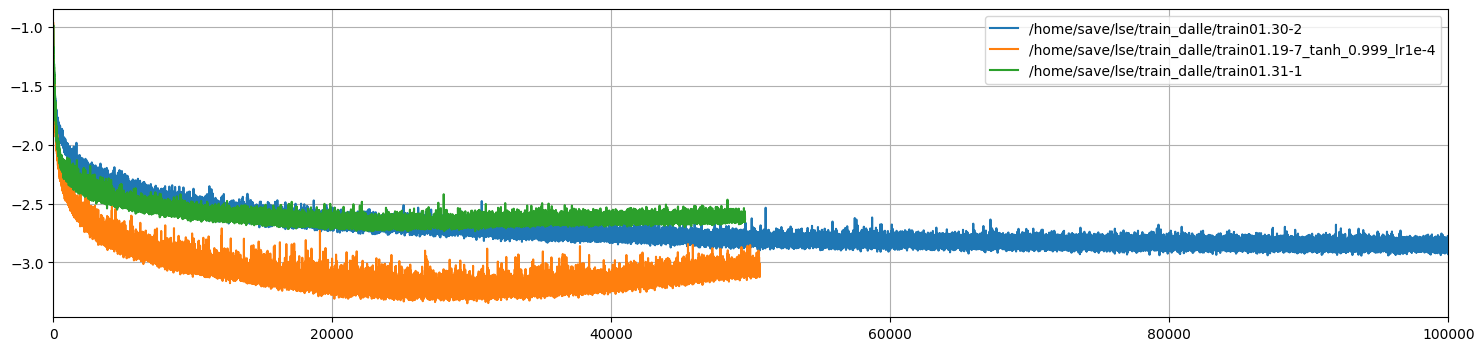

In [194]:
scalar0 = scalars[log_dirs[0]]['recon_loss']
scalar1 = scalars[log_dirs[1]]['recon_loss']
scalar2 = scalars[log_dirs[2]]['yq_recon_loss']

plt.figure(figsize=[18, 4])
plt.plot(scalar0[0], np.log10(scalar0[1]), label=log_dirs[0])
plt.plot(scalar1[0], np.log10(scalar1[1]), label=log_dirs[1])
plt.plot(scalar2[0], np.log10(scalar2[1]), label=log_dirs[2])
plt.grid()
plt.legend()
plt.xlim([0, 100*1000])
plt.show()

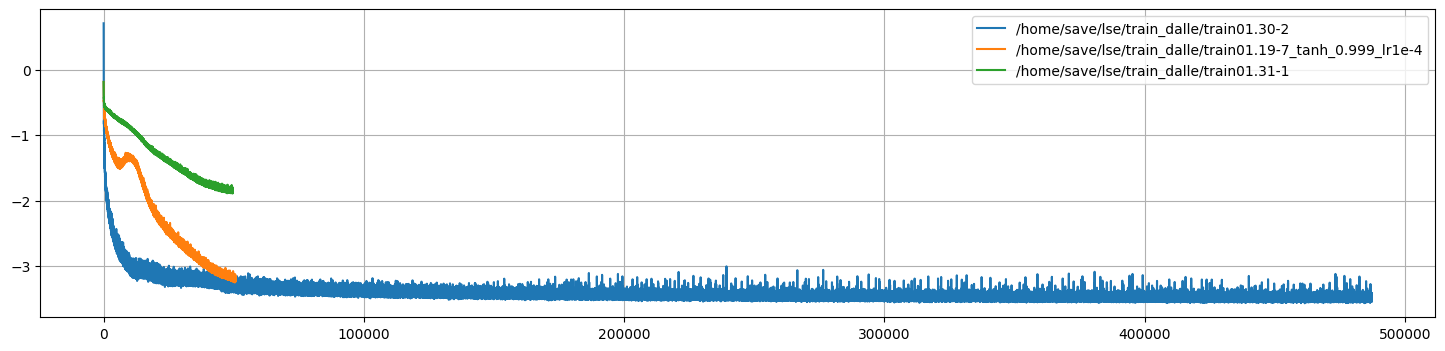

In [193]:
scalar0 = scalars[log_dirs[0]]['commit_loss']
scalar1 = scalars[log_dirs[1]]['commit_loss']
scalar2 = scalars[log_dirs[2]]['commit_loss']

plt.figure(figsize=[18, 4])
plt.plot(scalar0[0], np.log10(scalar0[1]), label=log_dirs[0])
plt.plot(scalar1[0], np.log10(scalar1[1]), label=log_dirs[1])
plt.plot(scalar2[0], np.log10(scalar2[1]), label=log_dirs[2])
plt.grid()
plt.legend()
#plt.xlim([0, 20*1000])
plt.show()